<a href="https://colab.research.google.com/github/AnshikaC/Face_recogition/blob/main/face_maskdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

kaggle datasets download -d omkargurav/face-mask-dataset



In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 95% 155M/163M [00:01<00:00, 125MB/s]
100% 163M/163M [00:01<00:00, 139MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2960.jpg', 'with_mask_987.jpg', 'with_mask_2959.jpg', 'with_mask_2255.jpg', 'with_mask_2717.jpg']
['with_mask_1540.jpg', 'with_mask_3644.jpg', 'with_mask_3115.jpg', 'with_mask_1149.jpg', 'with_mask_274.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2804.jpg', 'without_mask_2255.jpg', 'without_mask_1361.jpg', 'without_mask_1734.jpg', 'without_mask_597.jpg']
['without_mask_2163.jpg', 'without_mask_28.jpg', 'without_mask_2592.jpg', 'without_mask_1766.jpg', 'without_mask_3645.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


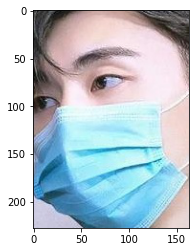

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

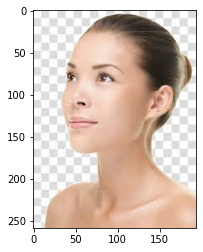

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[245, 246, 248],
        [245, 246, 248],
        [245, 246, 248],
        ...,
        [245, 246, 248],
        [244, 245, 247],
        [245, 246, 248]],

       [[245, 246, 248],
        [245, 246, 248],
        [245, 246, 248],
        ...,
        [245, 246, 248],
        [244, 245, 247],
        [245, 246, 248]],

       [[245, 246, 248],
        [245, 246, 248],
        [245, 246, 248],
        ...,
        [245, 246, 248],
        [244, 245, 247],
        [245, 246, 248]],

       ...,

       [[245, 246, 248],
        [245, 246, 248],
        [245, 246, 248],
        ...,
        [245, 246, 248],
        [244, 245, 247],
        [245, 246, 248]],

       [[245, 246, 248],
        [245, 246, 248],
        [245, 246, 248],
        ...,
        [245, 246, 248],
        [244, 245, 247],
        [245, 246, 248]],

       [[245, 246, 248],
        [245, 246, 248],
        [245, 246, 248],
        ...,
        [245, 246, 248],
        [244, 245, 247],
        [245, 246, 248]]

In [20]:
type(data[0])


numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train[0]

array([[[ 78,  77,  75],
        [ 77,  76,  74],
        [ 77,  76,  74],
        ...,
        [ 62,  64,  53],
        [ 68,  69,  58],
        [ 69,  69,  59]],

       [[ 78,  77,  73],
        [ 77,  76,  72],
        [ 77,  76,  72],
        ...,
        [ 71,  73,  62],
        [ 70,  70,  60],
        [ 70,  70,  60]],

       [[ 78,  78,  70],
        [ 77,  77,  69],
        [ 77,  77,  69],
        ...,
        [ 71,  73,  62],
        [ 70,  71,  61],
        [ 71,  71,  61]],

       ...,

       [[107, 119, 132],
        [ 93, 102, 114],
        [ 80,  85,  97],
        ...,
        [162, 163, 165],
        [169, 171, 172],
        [178, 179, 181]],

       [[ 59,  70,  88],
        [ 75,  83,  97],
        [ 94, 100, 108],
        ...,
        [173, 174, 179],
        [175, 176, 179],
        [181, 182, 184]],

       [[ 49,  60,  86],
        [ 94, 101, 112],
        [126, 132, 138],
        ...,
        [159, 155, 168],
        [155, 153, 164],
        [158, 157, 168]]

In [31]:
X_train_scaled[0]

array([[[0.30588235, 0.30196078, 0.29411765],
        [0.30196078, 0.29803922, 0.29019608],
        [0.30196078, 0.29803922, 0.29019608],
        ...,
        [0.24313725, 0.25098039, 0.20784314],
        [0.26666667, 0.27058824, 0.22745098],
        [0.27058824, 0.27058824, 0.23137255]],

       [[0.30588235, 0.30196078, 0.28627451],
        [0.30196078, 0.29803922, 0.28235294],
        [0.30196078, 0.29803922, 0.28235294],
        ...,
        [0.27843137, 0.28627451, 0.24313725],
        [0.2745098 , 0.2745098 , 0.23529412],
        [0.2745098 , 0.2745098 , 0.23529412]],

       [[0.30588235, 0.30588235, 0.2745098 ],
        [0.30196078, 0.30196078, 0.27058824],
        [0.30196078, 0.30196078, 0.27058824],
        ...,
        [0.27843137, 0.28627451, 0.24313725],
        [0.2745098 , 0.27843137, 0.23921569],
        [0.27843137, 0.27843137, 0.23921569]],

       ...,

       [[0.41960784, 0.46666667, 0.51764706],
        [0.36470588, 0.4       , 0.44705882],
        [0.31372549, 0

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 171s 999ms/step - loss: 0.4673 - acc: 0.7855 - val_loss: 0.2606 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 153s 898ms/step - loss: 0.2984 - acc: 0.8828 - val_loss: 0.2044 - val_acc: 0.9074
Epoch 3/5
170/170 [==============================] - 152s 890ms/step - loss: 0.2490 - acc: 0.9034 - val_loss: 0.2045 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 149s 880ms/step - loss: 0.2227 - acc: 0.9113 - val_loss: 0.1826 - val_acc: 0.9289
Epoch 5/5
170/170 [==============================] - 153s 903ms/step - loss: 0.1859 - acc: 0.9244 - val_loss: 0.1646 - val_acc: 0.9240


In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 220ms/step - loss: 0.2056 - acc: 0.9206
Test Accuracy = 0.9205824136734009


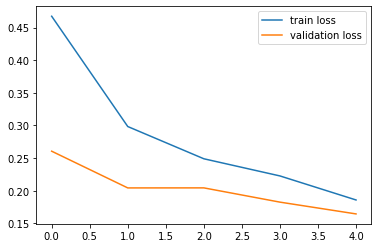

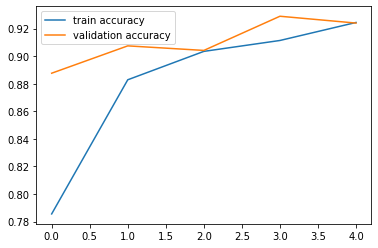

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/122.webp


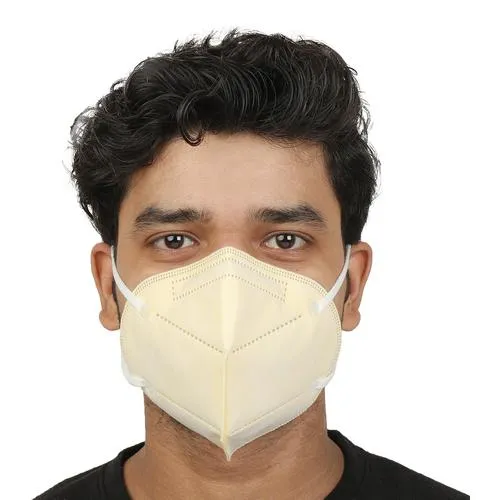

1/1 [==============================] - 0s 145ms/step
[[0.17407654 0.74141103]]
1
The person in the image is wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/21.jpeg


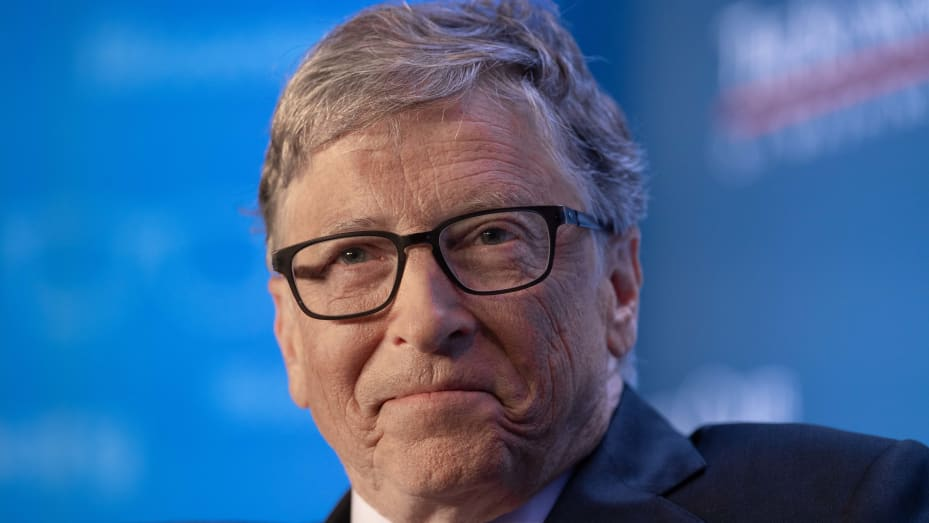

1/1 [==============================] - 0s 59ms/step
[[0.3976779  0.48992562]]
1
The person in the image is wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')